<a href="https://colab.research.google.com/github/nsbh123/TA_Data-Mining_Kel-12/blob/main/DATMIN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Tingkat Kesehatan Kandungan Ibu di Kecamatan Luwuk pada Desember 2022 Menggunakan Algoritma Decision Tree


## Preparasi data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#reading the dataset
data= pd.read_csv('https://raw.githubusercontent.com/jiorjioo/treasure/main/data_kehamilan.csv')
data.head(5)

,Usia Ibu (Tahun),Jumlah anak,Usia Anak Terakhir (Tahun),Usia Hamil Saat ini (Minggu),Tinggi Badan (),Berat Badan sebelum Hamil (),Berat Badan saat ini (),Pertambahan Berat Per Bulan (gram),Riwayat Penyakit,Status Anemia (Lihat hasil pemeriksaan di buku KIA),Lingkar Lengan Atas (LiLA),Tinggi Fundus Uteri (cm),Kesesuaian Tinggi Fundus Uteri dengan usia kehamilan,Taksiran Berat Janin (gram),Kesesuaian Usia Kehamilan Dengan Taksiran Berat Janin (Lihat grafik di buku KIA),Hasil Skrining,Status Pendampingan
0,28,0,Tidak Ada,3,152.0,50,54.0,4.0,Tidak Ada,Anemia (HB < 11 g/dl),≥ 23.5,0.0,Sesuai Usia Kehamilan,1.0,Tidak Tahu,Kehamilan Risiko Stunting,Pertama Kali Kunjungan
1,17,0,Tidak Ada,24,157.0,44,50.0,1.0,Tidak Ada,Tidak Anemia (HB ≥ 11g/dl),≥ 23.5,16.0,Sesuai Usia Kehamilan,1700.0,Sesuai Usia Kehamilan,Kehamilan Sehat,Trimester 2 (13-28 Minggu)
2,27,1,>3 Tahun,24,147.0,50,54.0,1.0,Tidak Ada,Tidak Anemia (HB ≥ 11g/dl),≥ 23.5,20.0,Sesuai Usia Kehamilan,1685.0,Sesuai Usia Kehamilan,Kehamilan Sehat,Trimester 2 (13-28 Minggu)
3,26,1,>3 Tahun,31,159.0,51,57.0,2.0,Tidak Ada,Tidak Anemia (HB ≥ 11g/dl),≥ 23.5,21.0,Sesuai Usia Kehamilan,2300.0,Sesuai Usia Kehamilan,Kehamilan Sehat,Trimester 3 (28-40 Minggu)
4,19,0,Tidak Ada,20,155.0,47,50.0,1.0,Tidak Ada,Tidak Anemia (HB ≥ 11g/dl),≥ 23.5,16.0,Sesuai Usia Kehamilan,1700.0,Sesuai Usia Kehamilan,Kehamilan Sehat,Trimester 2 (13-28 Minggu)


## Data Exploration

In [ ]:
# Menghapus data null
data = data.dropna()
data.isnull().sum()

Usia Ibu (Tahun)                                                                    0
Jumlah anak                                                                         0
Usia Anak Terakhir (Tahun)                                                          0
Usia Hamil Saat ini (Minggu)                                                        0
Tinggi Badan ()                                                                     0
Berat Badan sebelum Hamil ()                                                        0
Berat Badan saat ini ()                                                             0
Pertambahan Berat Per Bulan (gram)                                                  0
Riwayat Penyakit                                                                    0
Status Anemia (Lihat hasil pemeriksaan di buku KIA)                                 0
Lingkar Lengan Atas (LiLA)                                                          0
Tinggi Fundus Uteri (cm)                              

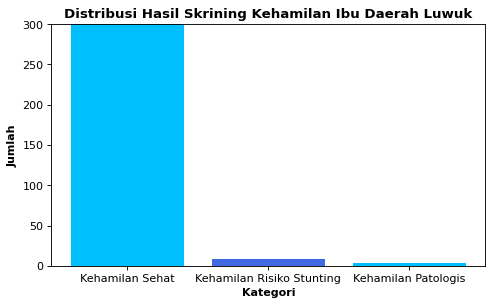

In [ ]:
height = data['Hasil Skrining'].value_counts()
labels = ('Kehamilan Sehat', 'Kehamilan Risiko Stunting', 'Kehamilan Patologis')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,300)
plt.title('Distribusi Hasil Skrining Kehamilan Ibu Daerah Luwuk', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

In [ ]:
# Encoding data
cleanup_nums = {"Hasil Skrining": {"Kehamilan Sehat": 0, "Kehamilan Risiko Stunting": 1, "Kehamilan Patologis":3},
                "Usia Anak Terakhir (Tahun)" : {">3 Tahun":0, "Tidak Ada":1, "<3 Tahun":2},
                "Riwayat Penyakit": {"Tidak Ada":0, "Hipertensi":1},
                "Kesesuaian Tinggi Fundus Uteri dengan usia kehamilan" : {"Sesuai Usia Kehamilan":0, "Tidak Sesuai Usia Kehamilan":1},
                "Status Anemia (Lihat hasil pemeriksaan di buku KIA)":{"Tidak Anemia (HB ≥ 11g/dl)":0,"Anemia (HB < 11 g/dl)":1},
                "Kesesuaian Usia Kehamilan Dengan Taksiran Berat Janin (Lihat grafik di buku KIA)":{"Sesuai Usia Kehamilan":0, "Tidak Sesuai Usia Kehamilan":1, "Tidak Tahu":2},
                "Jumlah anak":{'≤2':0, '0':1, '>2':2, '1':3, '≥2':4}
                }
data = data.replace(cleanup_nums)
data

,Usia Ibu (Tahun),Jumlah anak,Usia Anak Terakhir (Tahun),Usia Hamil Saat ini (Minggu),Tinggi Badan (),Berat Badan sebelum Hamil (),Berat Badan saat ini (),Pertambahan Berat Per Bulan (gram),Riwayat Penyakit,Status Anemia (Lihat hasil pemeriksaan di buku KIA),Lingkar Lengan Atas (LiLA),Tinggi Fundus Uteri (cm),Kesesuaian Tinggi Fundus Uteri dengan usia kehamilan,Taksiran Berat Janin (gram),Kesesuaian Usia Kehamilan Dengan Taksiran Berat Janin (Lihat grafik di buku KIA),Hasil Skrining,Status Pendampingan
0,28,1,1,3,152.0,50,54.0,4.0,0,1,≥ 23.5,0.0,0,1.0,2,1,Pertama Kali Kunjungan
1,17,1,1,24,157.0,44,50.0,1.0,0,0,≥ 23.5,16.0,0,1700.0,0,0,Trimester 2 (13-28 Minggu)
2,27,3,0,24,147.0,50,54.0,1.0,0,0,≥ 23.5,20.0,0,1685.0,0,0,Trimester 2 (13-28 Minggu)
3,26,3,0,31,159.0,51,57.0,2.0,0,0,≥ 23.5,21.0,0,2300.0,0,0,Trimester 3 (28-40 Minggu)
4,19,1,1,20,155.0,47,50.0,1.0,0,0,≥ 23.5,16.0,0,1700.0,0,0,Trimester 2 (13-28 Minggu)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,35,2,0,30,145.0,45,53.0,1.0,0,0,≥ 23.5,30.0,0,1200.0,0,0,Trimester 3 (28-40 Minggu)
481,34,2,0,22,142.0,67,73.0,1.0,0,0,≥ 23.5,22.0,0,300.0,0,0,Trimester 2 (13-28 Minggu)
482,28,0,0,24,154.0,47,53.0,1.0,0,0,≥ 23.5,23.0,0,450.0,0,0,Trimester 2 (13-28 Minggu)
483,39,0,0,20,148.0,56,61.0,1.0,0,0,≥ 23.5,22.0,0,300.0,0,0,Trimester 2 (13-28 Minggu)


In [ ]:
data = data.drop(["Lingkar Lengan Atas (LiLA)","Status Pendampingan"], axis = "columns")

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
data2 = scaled_df

data2

,Usia Ibu (Tahun),Jumlah anak,Usia Anak Terakhir (Tahun),Usia Hamil Saat ini (Minggu),Tinggi Badan (),Berat Badan sebelum Hamil (),Berat Badan saat ini (),Pertambahan Berat Per Bulan (gram),Riwayat Penyakit,Status Anemia (Lihat hasil pemeriksaan di buku KIA),Tinggi Fundus Uteri (cm),Kesesuaian Tinggi Fundus Uteri dengan usia kehamilan,Taksiran Berat Janin (gram),Kesesuaian Usia Kehamilan Dengan Taksiran Berat Janin (Lihat grafik di buku KIA),Hasil Skrining
0,0.413793,0.25,0.5,0.026316,0.883871,0.316129,0.192308,0.666667,0.0,1.0,0.000,0.0,0.000059,1.0,0.333333
1,0.034483,0.25,0.5,0.578947,0.916129,0.277419,0.141026,0.166667,0.0,0.0,0.400,0.0,0.099707,0.0,0.000000
2,0.379310,0.75,0.0,0.578947,0.851613,0.316129,0.192308,0.166667,0.0,0.0,0.500,0.0,0.098827,0.0,0.000000
3,0.344828,0.75,0.0,0.763158,0.929032,0.322581,0.230769,0.333333,0.0,0.0,0.525,0.0,0.134897,0.0,0.000000
4,0.103448,0.25,0.5,0.473684,0.903226,0.296774,0.141026,0.166667,0.0,0.0,0.400,0.0,0.099707,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.655172,0.50,0.0,0.736842,0.838710,0.283871,0.179487,0.166667,0.0,0.0,0.750,0.0,0.070381,0.0,0.000000
420,0.620690,0.50,0.0,0.526316,0.819355,0.425806,0.435897,0.166667,0.0,0.0,0.550,0.0,0.017595,0.0,0.000000
421,0.413793,0.00,0.0,0.578947,0.896774,0.296774,0.179487,0.166667,0.0,0.0,0.575,0.0,0.026393,0.0,0.000000
422,0.793103,0.00,0.0,0.473684,0.858065,0.354839,0.282051,0.166667,0.0,0.0,0.550,0.0,0.017595,0.0,0.000000


## Penerapan Decision Tree

In [ ]:
data2 = data.filter(['Usia Ibu (Tahun)', 'Tinggi Badan ()', 'Berat Badan saat ini ()', 'Tinggi Fundus Uteri (cm)', 'Taksiran Berat Janin (gram)', 'Status Anemia (Lihat hasil pemeriksaan di buku KIA)'], axis=1)
features = pd.DataFrame(data2)
labels = pd.DataFrame(data['Hasil Skrining'])

In [ ]:
# Split data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.4, random_state=0)
print(features.shape)
print(labels.shape)

(424, 6)
(424, 1)


In [ ]:
# Prediksi Decision Tree
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


## Testing

In [ ]:
# Test akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, pred)
print(accuracy)

0.9470588235294117


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
model = DecisionTreeClassifier(random_state=1)
model = model.fit(features_train, labels_train)

y_pred = model.predict(features_test)
cm = confusion_matrix(labels_test,y_pred)
accuracy = accuracy_score(labels_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[161   1   3]
 [  1   1   1]
 [  2   0   0]]
  
accuracy= 9.529411764705882


## Evaluasi model dengan MAE, MSE, RMSE, dan R2 Square

> Indented block



In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, features, labels, cv=10)
    return pred.mean()

In [ ]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())])

x_train = pipeline.fit_transform(features_train)
x_test = pipeline.transform(features_test)

## Evaluasi model dengan Regresi Linear

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,labels_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
print(lin_reg.intercept_)

[0.04724409]


In [ ]:
pred = lin_reg.predict(x_test)

In [ ]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

In [ ]:
# Hasil evaluasi
print_evaluate(labels_test, test_pred)

MAE: 0.1114888872194348
MSE: 0.12357051459060886
RMSE: 0.3515259799653631
R2 Square -0.02355628308070945


## Prediksi model

In [ ]:
userdata = [['6','1','5','9','2','1']]
ynewclass = model.predict(userdata)
ynew = model.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

[0]
Probabilities of all classes:  [[1. 0. 0.]]
Probability of Predicted class :  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Classes =
- 1 = Kehamilan Sehat
- 2 = Kehamilan Risiko Stunting
- 3 = Kehamilan Patologis